# Backbone results

## Import libraries

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/tmp/ipykernel_2002292/2099343663.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Construct table

In [2]:
output = []
for dataset in ["CASP13", "CASP14"]:
    dataset_path = Path(dataset)
    for template_path in dataset_path.glob("*.fasta"):
        template = template_path.stem
        methods = [
            "FLAT_1",
            "FLAT_1_AF",
            "FLAT_1_RANK",
            "FLAT_1_OF_SS_1",
            "FLAT_1_OF_SS_1_prev",
            "FLAT_1_OF_EMPTY_1",
            "FLAT_1_OF_EMPTY_1_prev",
            "FLAT_1_OF_SS_2",
            "FLAT_1_OF_SS_2_prev",
            "FLAT_1_OF_EMPTY_2",
            "FLAT_1_OF_EMPTY_2_prev",
            "FLAT_2",
            "FLAT_2_AF",
            "FLAT_2_RANK",
            "FLAT_2_OF_SS_1",
            "FLAT_2_OF_SS_1_prev",
            "FLAT_2_OF_EMPTY_1",
            "FLAT_2_OF_EMPTY_1_prev",
            "FLAT_2_OF_SS_2",
            "FLAT_2_OF_SS_2_prev",
            "FLAT_2_OF_EMPTY_2",
            "FLAT_2_OF_EMPTY_2_prev",
            "NOISE",
            "NOISE_AF",
            "NOISE_RANK",
            "NOISE_OF_SS_1",
            "NOISE_OF_SS_1_prev",
            "NOISE_OF_EMPTY_1",
            "NOISE_OF_EMPTY_1_prev",
            "NOISE_OF_SS_2",
            "NOISE_OF_SS_2_prev",
            "NOISE_OF_EMPTY_2",
            "NOISE_OF_EMPTY_2_prev",
            "full",
            "single",
            "no_prev_x_1",
            "no_prev_x_2",
            "prev_x_1",
            "prev_x_2",
        ]
        methods1 = [
            [
                f"RF_{noise}",
                f"RF_{noise}_FASPR",
                f"RF_{noise}_ATTN",
                f"RF_{noise}_FASPR_AF",
                f"RF_{noise}_ATTN_AF",
                f"RF_{noise}_RANK",
                f"RF_{noise}_OF_SS_1",
                f"RF_{noise}_OF_EMPTY_1",
                f"RF_{noise}_OF_SS_2",
                f"RF_{noise}_OF_EMPTY_2",
                f"RF_{noise}_OF_SS_1_prev",
                f"RF_{noise}_OF_EMPTY_1_prev",
                f"RF_{noise}_OF_SS_2_prev",
                f"RF_{noise}_OF_EMPTY_2_prev",
            ]
            for noise in ["1", "5", "10"]
        ]
        methods.extend(sum(methods1, []))
        for method in methods:
            if Path(f"{dataset_path}_{method}/{template}/ost_scores.json").exists():
                scores_path = Path(
                    f"{dataset_path}_{method}/{template}/ost_scores.json"
                )
            elif Path(f"{dataset_path}_{method}/{template}/scores.json").exists():
                scores_path = Path(f"{dataset_path}_{method}/{template}/scores.json")
            else:
                continue
            with open(scores_path, "r") as scores_file:
                curr_score = json.load(scores_file)
            if not ("tm_score" in curr_score):
                continue
            curr_output = {
                "dataset": dataset,
                "template": template,
                "method": method,
                "tm_score": curr_score["tm_score"],
                "rmsd": curr_score["rmsd"],
                "lddt": curr_score["lddt"],
            }
            output.append(curr_output)
df = pd.DataFrame(output)
df

,dataset,template,method,tm_score,rmsd,lddt
0,CASP13,T0969,FLAT_1,0.184947,15.804703,0.201201
1,CASP13,T0969,FLAT_1_AF,0.430875,22.568161,0.268575
2,CASP13,T0969,FLAT_1_OF_SS_1,0.419058,18.211006,0.248812
3,CASP13,T0969,FLAT_1_OF_SS_1_prev,0.465021,15.086960,0.284636
4,CASP13,T0969,FLAT_1_OF_EMPTY_1,0.337700,23.883917,0.217927
...,...,...,...,...,...,...
9372,CASP14,T1074,RF_10_OF_EMPTY_2,0.880477,2.098469,0.821528
9373,CASP14,T1074,RF_10_OF_SS_1_prev,0.489576,10.667376,0.396168
9374,CASP14,T1074,RF_10_OF_EMPTY_1_prev,0.558215,10.026975,0.411724
9375,CASP14,T1074,RF_10_OF_SS_2_prev,0.502664,10.310660,0.392229


## Check if all setups are here
T0954 missing

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df[df.template != "T0954"].groupby(["method", "dataset"])["template"].agg("count")

method                  dataset
FLAT_1                  CASP13     77
                        CASP14     62
FLAT_1_AF               CASP13     77
                        CASP14     62
FLAT_1_OF_EMPTY_1       CASP13     77
                        CASP14     62
FLAT_1_OF_EMPTY_1_prev  CASP13     60
                        CASP14     48
FLAT_1_OF_EMPTY_2       CASP13     77
                        CASP14     62
FLAT_1_OF_EMPTY_2_prev  CASP13     60
                        CASP14     48
FLAT_1_OF_SS_1          CASP13     77
                        CASP14     62
FLAT_1_OF_SS_1_prev     CASP13     60
                        CASP14     47
FLAT_1_OF_SS_2          CASP13     77
                        CASP14     62
FLAT_1_OF_SS_2_prev     CASP13     60
                        CASP14     47
FLAT_2                  CASP13     77
                        CASP14     62
FLAT_2_AF               CASP13     77
                        CASP14     62
FLAT_2_OF_EMPTY_1       CASP13     77
                  

In [4]:
df.loc[df['template'].isin(df[df.method=="RF_5_OF_SS_2_prev"].template.unique()), :][["method","dataset","tm_score","rmsd","lddt"]].groupby(["method","dataset"]).agg("mean")

tm_score       rmsd      lddt
method                 dataset                               
FLAT_1                 CASP13   0.215161  14.756168  0.237598
                       CASP14   0.233185  12.896836  0.248595
FLAT_1_AF              CASP13   0.457602  18.465541  0.391912
                       CASP14   0.481709  15.952403  0.429780
FLAT_1_OF_EMPTY_1      CASP13   0.380277  20.063837  0.337350
                       CASP14   0.411934  17.272175  0.377304
FLAT_1_OF_EMPTY_1_prev CASP13   0.393349  20.108522  0.354203
                       CASP14   0.386796  18.468323  0.357638
FLAT_1_OF_EMPTY_2      CASP13   0.367441  20.678187  0.337279
                       CASP14   0.402216  17.912629  0.368855
FLAT_1_OF_EMPTY_2_prev CASP13   0.359345  20.584503  0.327747
                       CASP14   0.384642  18.896924  0.359255
FLAT_1_OF_SS_1         CASP13   0.375103  20.161708  0.343480
                       CASP14   0.430703  17.025762  0.394167
FLAT_1_OF_SS_1_prev    CASP13   0.382969  20.005705  0.345439
                       CASP14   0.399625  17.465645  0.368336
FLAT_1_OF_SS_2         CASP13   0.374635  19.559803  0.338871
                       CASP14   0.408094  17.785804  0.374749
FLAT_1_OF_SS_2_prev    CASP13   0.355408  20.624023  0.331524
                       CASP14   0.392942  18.190108  0.363271
FLAT_2                 CASP13   0.464287   9.883876  0.535393
                       CASP14   0.500748   7.947195  0.543746
FLAT_2_AF              CASP13   0.837911   5.715163  0.791918
                       CASP14   0.882507   2.898779  0.819235
FLAT_2_OF_EMPTY_1      CASP13   0.578206  13.417242  0.518703
                       CASP14   0.626815   9.515697  0.547461
FLAT_2_OF_EMPTY_1_prev CASP13   0.396987  19.465630  0.357831
                       CASP14   0.405862  17.757110  0.370918
FLAT_2_OF_EMPTY_2      CASP13   0.621094  12.525634  0.552455
                       CASP14   0.683253   7.686626  0.595644
FLAT_2_OF_EMPTY_2_prev CASP13   0.363789  20.447413  0.332148
                       CASP14   0.395785  18.999128  0.367661
FLAT_2_OF_SS_1         CASP13   0.562660  14.009369  0.498224
                       CASP14   0.620299   9.902044  0.542611
FLAT_2_OF_SS_1_prev    CASP13   0.421399  19.028936  0.372642
                       CASP14   0.419984  16.954946  0.379691
FLAT_2_OF_SS_2         CASP13   0.579665  13.565723  0.516052
                       CASP14   0.615691   9.466639  0.537986
FLAT_2_OF_SS_2_prev    CASP13   0.365468  20.338220  0.340121
                       CASP14   0.403239  18.260112  0.367470
NOISE                  CASP13   0.900315   1.710485  0.659433
                       CASP14   0.888458   1.708898  0.659678
NOISE_AF               CASP13   0.935366   2.234770  0.839491
                       CASP14   0.922174   1.808239  0.821353
NOISE_OF_EMPTY_1       CASP13   0.676847  10.307357  0.609658
                       CASP14   0.784404   5.266433  0.677903
NOISE_OF_EMPTY_1_prev  CASP13   0.412096  19.096090  0.364877
                       CASP14   0.409667  17.990164  0.369801
NOISE_OF_EMPTY_2       CASP13   0.700895  10.418343  0.622171
                       CASP14   0.792074   4.807867  0.687039
NOISE_OF_EMPTY_2_prev  CASP13   0.372442  20.042748  0.336454
                       CASP14   0.389880  19.083096  0.361291
NOISE_OF_SS_1          CASP13   0.663476  10.929803  0.596019
                       CASP14   0.749228   6.325829  0.651265
NOISE_OF_SS_1_prev     CASP13   0.421218  18.996472  0.378091
                       CASP14   0.424655  16.756681  0.386109
NOISE_OF_SS_2          CASP13   0.661735  11.073222  0.594474
                       CASP14   0.744067   6.451352  0.644529
NOISE_OF_SS_2_prev     CASP13   0.371270  20.350697  0.343219
                       CASP14   0.399759  18.058375  0.366204
RF_10_ATTN             CASP13   0.868120   2.494258  0.685011
                       CASP14   0.872870   2.083094  0.687631
RF_10_ATTN_AF          CASP13   0.871500   2.923748  0.714572
  

In [5]:
df.loc[df['template'].isin(df[df.method=="RF_5_OF_SS_2_prev"].template.unique()), :].loc[df.method.isin(["full","noprevx_1","noprevx_2","single", "NOISE_OF_SS_1_prev","NOISE_OF_SS_2_prev", "NOISE_OF_EMPTY_1"])][["method","dataset","tm_score","rmsd","lddt"]].groupby(["method","dataset"]).agg("mean")

tm_score       rmsd      lddt
method             dataset                               
NOISE_OF_EMPTY_1   CASP13   0.676847  10.307357  0.609658
                   CASP14   0.784404   5.266433  0.677903
NOISE_OF_SS_1_prev CASP13   0.421218  18.996472  0.378091
                   CASP14   0.424655  16.756681  0.386109
NOISE_OF_SS_2_prev CASP13   0.371270  20.350697  0.343219
                   CASP14   0.399759  18.058375  0.366204
full               CASP13   0.857630   4.626538  0.833481
                   CASP14   0.843094   4.859278  0.796645
single             CASP13   0.369524  20.433934  0.334687
                   CASP14   0.386479  18.898157  0.355667

## Table constants

In [6]:
# some variable names need to be changed
columns = [
    "TM-score $\\uparrow$",
    "lDDT $\\uparrow$",
    "$\\alpha$-RMSD ($\\AA$) $\\downarrow$",
]
measure_dict = {
    "lddt": "lDDT $\\uparrow$",
    "tm_score": "TM-score $\\uparrow$",
    "af_pLDDT_mean": "pLDDT $\\uparrow$",
    "rmsd": "$\\alpha$-RMSD ($\\AA$) $\\downarrow$",
    "method": "Method",
    "dataset": "Dataset",
}
method_dict = {
    "full": "MSA",
    "single": "Single",
    "NOISE": "Gaussian",
    "NOISE_AF": "Gaussian (AF)",
    "NOISE_OF_SS": "Gaussian (Rank Single)",
    "NOISE_OF_EMPTY": "Gaussian (Rank Empty)",
    "FLAT_1": "1 PC",
    "FLAT_1_AF": "1 PC (AF)",
    "FLAT_1_OF_SS": "1 PC (Rank Single)",
    "FLAT_1_OF_EMPTY": "1 PC (Rank Empty)",
    "FLAT_2": "2 PC",
    "FLAT_2_AF": "2 PC (AF)",
    "FLAT_2_OF_SS": "2 PC (Rank Single)",
    "FLAT_2_OF_EMPTY": "2 PC (Rank Empty)",
    "RF_1_ATTN": "1 RFDiff (AP)",
    "RF_1_ATTN_AF": "1 RFDiff (AP AF)",
    "RF_1_FASPR": "1 RFDiff (FASPR)",
    "RF_1_FASPR_AF": "1 RFDiff (FASPR AF)",
    "RF_1_OF_SS": "1 RFDiff (Rank Single)",
    "RF_1_OF_EMPTY": "1 RFDiff (Rank Empty)",
    "RF_5_ATTN": "5 RFDiff (AP)",
    "RF_5_ATTN_AF": "5 RFDiff (AP AF)",
    "RF_5_FASPR": "5 RFDiff (FASPR)",
    "RF_5_FASPR_AF": "5 RFDiff (FASPR AF)",
    "RF_5_OF_SS": "5 RFDiff (Rank Single)",
    "RF_5_OF_EMPTY": "5 RFDiff (Rank Empty)",
    "RF_10_ATTN": "10 RFDiff (AP)",
    "RF_10_ATTN_AF": "10 RFDiff (AP AF)",
    "RF_10_FASPR_AF": "10 RFDiff (FASPR AF)",
    "RF_10_FASPR": "10 RFDiff (FASPR)",
    "RF_10_OF_SS": "10 RFDiff (Rank Single)",
    "RF_10_OF_EMPTY": "10 RFDiff (Rank Empty)",
}

## Prepare DataFrame

In [7]:
df = df[df.template != "T0954"]
df["type"] = df["method"].apply(
    lambda x: x[:-2] if x[-1].isnumeric() and len(x) > 6 else x
)
df["Method"] = df.rename(measure_dict, axis=1)["type"].replace(method_dict)
grouped = (
    df.drop("method", axis=1)
    .rename(measure_dict, axis=1)
    .sort_values("TM-score $\\uparrow$", ascending=False)
    .groupby(["Method", "template"])
    .agg("first")
    .groupby(["Method", "Dataset"])[columns]
    .agg("mean")
    .sort_values(["Method", "Dataset"])
)
grouped_std = (
    df.drop("method", axis=1)
    .rename(measure_dict, axis=1)
    .sort_values("TM-score $\\uparrow$", ascending=False)
    .groupby(["Method", "template"])
    .agg("first")
    .groupby(["Method", "Dataset"])[columns]
    .agg("std")
    .sort_values(["Method", "Dataset"])
)
for column in columns:
    grouped_std[f"{column}"] = (
        grouped[column].apply(lambda x: f"{x:.3f}")
        + "$\\pm$"
        + grouped_std[column].apply(lambda x: f"{x:.3f}")
    )
grouped_std


/tmp/ipykernel_2002292/3110495849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type"] = df["method"].apply(
/tmp/ipykernel_2002292/3110495849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Method"] = df.rename(measure_dict, axis=1)["type"].replace(method_dict)


TM-score $\uparrow$  lDDT $\uparrow$  \
Method                  Dataset                                        
1 PC                    CASP13      0.215$\pm$0.036  0.238$\pm$0.035   
                        CASP14      0.228$\pm$0.053  0.245$\pm$0.036   
1 PC (AF)               CASP13      0.458$\pm$0.202  0.392$\pm$0.184   
                        CASP14      0.443$\pm$0.213  0.394$\pm$0.204   
1 PC (Rank Empty)       CASP13      0.402$\pm$0.160  0.352$\pm$0.141   
                        CASP14      0.398$\pm$0.172  0.357$\pm$0.156   
1 PC (Rank Single)      CASP13      0.402$\pm$0.150  0.358$\pm$0.134   
                        CASP14      0.412$\pm$0.170  0.368$\pm$0.163   
1 RFDiff (AP AF)        CASP13      0.961$\pm$0.072  0.855$\pm$0.087   
                        CASP14      0.967$\pm$0.028  0.853$\pm$0.044   
1 RFDiff (AP)           CASP13      0.970$\pm$0.037  0.836$\pm$0.028   
                        CASP14      0.974$\pm$0.013  0.827$\pm$0.028   
1 RFDiff (FASPR AF)     CASP13      0.959$\pm$0.074  0.844$\pm$0.085   
                        CASP14      0.968$\pm$0.027  0.842$\pm$0.043   
1 RFDiff (FASPR)        CASP13      0.970$\pm$0.037  0.810$\pm$0.028   
                        CASP14      0.974$\pm$0.013  0.804$\pm$0.026   
1 RFDiff (Rank Empty)   CASP13      0.883$\pm$0.128  0.809$\pm$0.063   
                        CASP14      0.881$\pm$0.095  0.785$\pm$0.084   
1 RFDiff (Rank Single)  CASP13      0.845$\pm$0.162  0.773$\pm$0.089   
                        CASP14      0.853$\pm$0.107  0.754$\pm$0.087   
10 RFDiff (AP AF)       CASP13      0.879$\pm$0.092  0.721$\pm$0.089   
                        CASP14      0.889$\pm$0.050  0.728$\pm$0.059   
10 RFDiff (AP)          CASP13      0.867$\pm$0.072  0.685$\pm$0.048   
                        CASP14      0.873$\pm$0.052  0.684$\pm$0.048   
10 RFDiff (FASPR AF)    CASP13      0.874$\pm$0.092  0.709$\pm$0.088   
                        CASP14      0.884$\pm$0.053  0.715$\pm$0.059   
10 RFDiff (FASPR)       CASP13      0.867$\pm$0.072  0.669$\pm$0.047   
                        CASP14      0.873$\pm$0.052  0.670$\pm$0.046   
10 RFDiff (Rank Empty)  CASP13      0.854$\pm$0.128  0.764$\pm$0.077   
                        CASP14      0.844$\pm$0.099  0.742$\pm$0.089   
10 RFDiff (Rank Single) CASP13      0.818$\pm$0.158  0.733$\pm$0.094   
                        CASP14      0.817$\pm$0.109  0.712$\pm$0.095   
2 PC                    CASP13      0.464$\pm$0.077  0.535$\pm$0.084   
                        CASP14      0.487$\pm$0.075  0.534$\pm$0.090   
2 PC (AF)               CASP13      0.838$\pm$0.212  0.792$\pm$0.166   
                        CASP14      0.862$\pm$0.149  0.793$\pm$0.124   
2 PC (Rank Empty)       CASP13      0.626$\pm$0.235  0.558$\pm$0.190   
                        CASP14      0.618$\pm$0.211  0.536$\pm$0.185   
2 PC (Rank Single)      CASP13      0.596$\pm$0.227  0.531$\pm$0.183   
                        CASP14      0.575$\pm$0.201  0.499$\pm$0.179   
5 RFDiff (AP AF)        CASP13      0.922$\pm$0.085  0.781$\pm$0.084   
                        CASP14      0.935$\pm$0.036  0.785$\pm$0.048   
5 RFDiff (AP)           CASP13      0.918$\pm$0.063  0.745$\pm$0.036   
                        CASP14      0.927$\pm$0.032  0.742$\pm$0.037   
5 RFDiff (FASPR AF)     CASP13      0.919$\pm$0.089  0.768$\pm$0.083   
                        CASP14      0.933$\pm$0.036  0.772$\pm$0.049   
5 RFDiff (FASPR)        CASP13      0.918$\pm$0.063  0.725$\pm$0.037   
                        CASP14      0.927$\pm$0.032  0.723$\pm$0.035   
5 RFDiff (Rank Empty)   CASP13      0.873$\pm$0.125  0.788$\pm$0.066   
                        CASP14      0.868$\pm$0.091  0.767$\pm$0.078   
5 RFDiff (Rank Single)  CASP13      0.832$\pm$0.164  0.749$\pm$0.095   
                        CASP14      0.842$\pm$0.102  0.743$\pm$0.082   
FLAT_1_OF_EMPTY_1_prev  CASP13      0.393$\pm$0.152  0.354$\pm$0.142   
                        CASP14      0.387$\pm$0.192  0.358$\pm$0.181   


## Make table

In [8]:
selected_rows = list(method_dict.values())
grouped_std.loc[selected_rows].to_latex(escape=False, bold_rows=True)

'\\begin{tabular}{lllll}\n\\toprule\n &  & TM-score $\\uparrow$ & lDDT $\\uparrow$ & $\\alpha$-RMSD ($\\AA$) $\\downarrow$ \\\\\nMethod & Dataset &  &  &  \\\\\n\\midrule\n\\multirow[t]{2}{*}{\\textbf{MSA}} & \\textbf{CASP13} & 0.858$\\pm$0.162 & 0.833$\\pm$0.095 & 4.627$\\pm$5.258 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.840$\\pm$0.147 & 0.791$\\pm$0.116 & 4.841$\\pm$5.207 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{Single}} & \\textbf{CASP13} & 0.370$\\pm$0.144 & 0.335$\\pm$0.127 & 20.434$\\pm$11.086 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.366$\\pm$0.168 & 0.336$\\pm$0.152 & 19.620$\\pm$9.652 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{Gaussian}} & \\textbf{CASP13} & 0.900$\\pm$0.053 & 0.659$\\pm$0.003 & 1.710$\\pm$0.055 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.896$\\pm$0.052 & 0.659$\\pm$0.004 & 1.712$\\pm$0.058 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{Gaussian (AF)}} & \\textbf{CASP13} & 0.935$\\pm$0.075 & 0.839$\\pm$0.054 & 2.235$\\pm$4.849 \\\\\n\\textbf{} & \\tex

## Prepare DataFrame

In [9]:
rfdiff1 = df[df["method"].str.startswith("RF_1_FASPR")]
rfdiff10 = df[df["method"].str.startswith("RF_10_FASPR")]
grp_rdiff1 = (
    rfdiff1[rfdiff1["dataset"] == "CASP14"].groupby(["type", "template"]).agg("first")
)
grp_rdiff10 = (
    rfdiff10[rfdiff10["dataset"] == "CASP14"].groupby(["type", "template"]).agg("first")
)


## Plotting constants

In [10]:
SMALL_SIZE = 30
BIGGER_SIZE = 30
AXES_SIZE = 20
LEGEND_SIZE = 15
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=AXES_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=AXES_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=LEGEND_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Plotting RFDiffusion

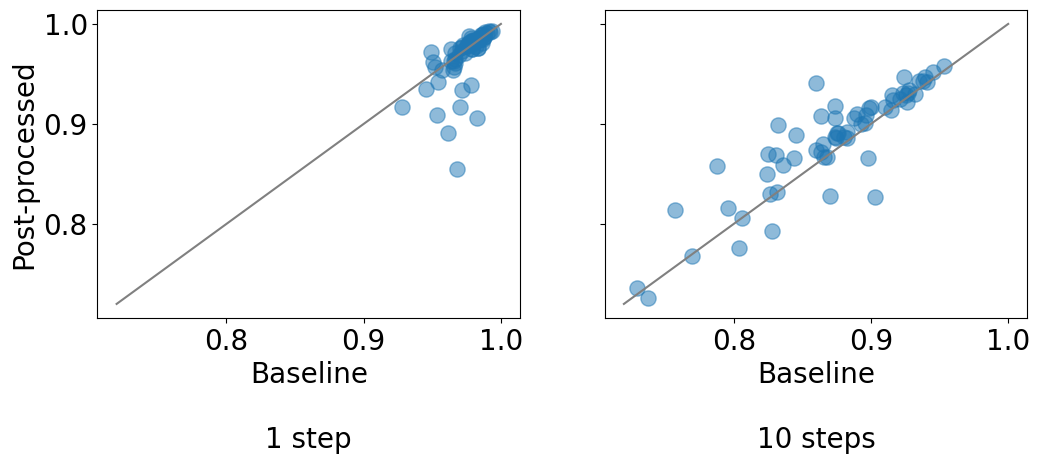

<Figure size 640x480 with 0 Axes>

In [11]:
fig, (rdiff1, rdiff10) = plt.subplots(1, 2, sharey="row", figsize=(12, 4))
rdiff1.scatter(
    [
        grp_rdiff1.loc["RF_1_FASPR", template]["tm_score"]
        for template in set([temp[1] for temp in grp_rdiff1.index])
    ],
    [
        grp_rdiff1.loc["RF_1_FASPR_AF", template]["tm_score"]
        for template in set([temp[1] for temp in grp_rdiff1.index])
    ],
    s=120,
    alpha=0.5,
)
rdiff1.plot([0.72, 1], [0.72, 1], c="grey")
rdiff1.set_xlabel("Baseline\n\n1 step")
rdiff1.set_ylabel("Post-processed")
rdiff10.scatter(
    [
        grp_rdiff10.loc["RF_10_FASPR", template]["tm_score"]
        for template in set([temp[1] for temp in grp_rdiff10.index])
    ],
    [
        grp_rdiff10.loc["RF_10_FASPR_AF", template]["tm_score"]
        for template in set([temp[1] for temp in grp_rdiff10.index])
    ],
    s=120,
    alpha=0.5,
)
rdiff10.plot([0.72, 1], [0.72, 1], c="grey")
rdiff10.set_xlabel("Baseline\n\n10 steps")
plt.savefig(
    f"visualisations/RF_shared_FASPR_CASP14.svg", bbox_inches="tight", transparent=True
)
plt.show()
plt.clf()


## Plotting violin plot constants

In [12]:
# Some labels need to be changed
order = [
    "MSA",
    "Single",
    "Gaussian",
    "Gaussian (AF)",
    "1 PC",
    "1 PC (AF)",
    "2 PC",
    "2 PC (AF)",
]
measure_dict = {
    "lddt": "lDDT $\\uparrow$",
    "tm_score": "TM-score",
    "af_pLDDT_mean": "pLDDT $\\uparrow$",
    "rmsd": "$\\alpha$-RMSD ($\\AA$) $\\downarrow$",
    "method": "Method",
    "dataset": "Dataset",
}
SMALL_SIZE = 30
BIGGER_SIZE = 30
AXES_SIZE = 20
LEGEND_SIZE = 15
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=AXES_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=AXES_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=LEGEND_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set_style("whitegrid")


## Plotting violin plot

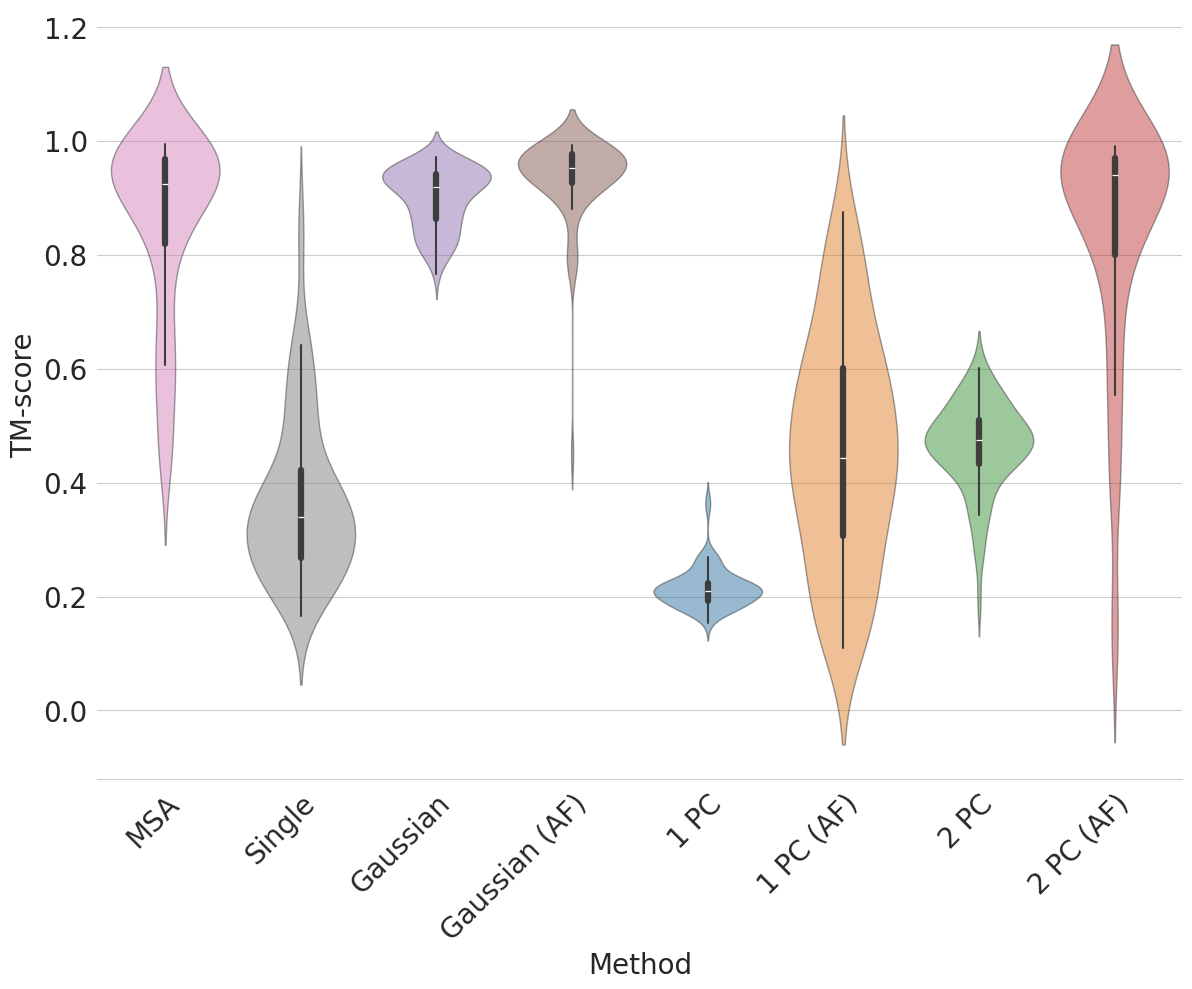

<Figure size 640x480 with 0 Axes>

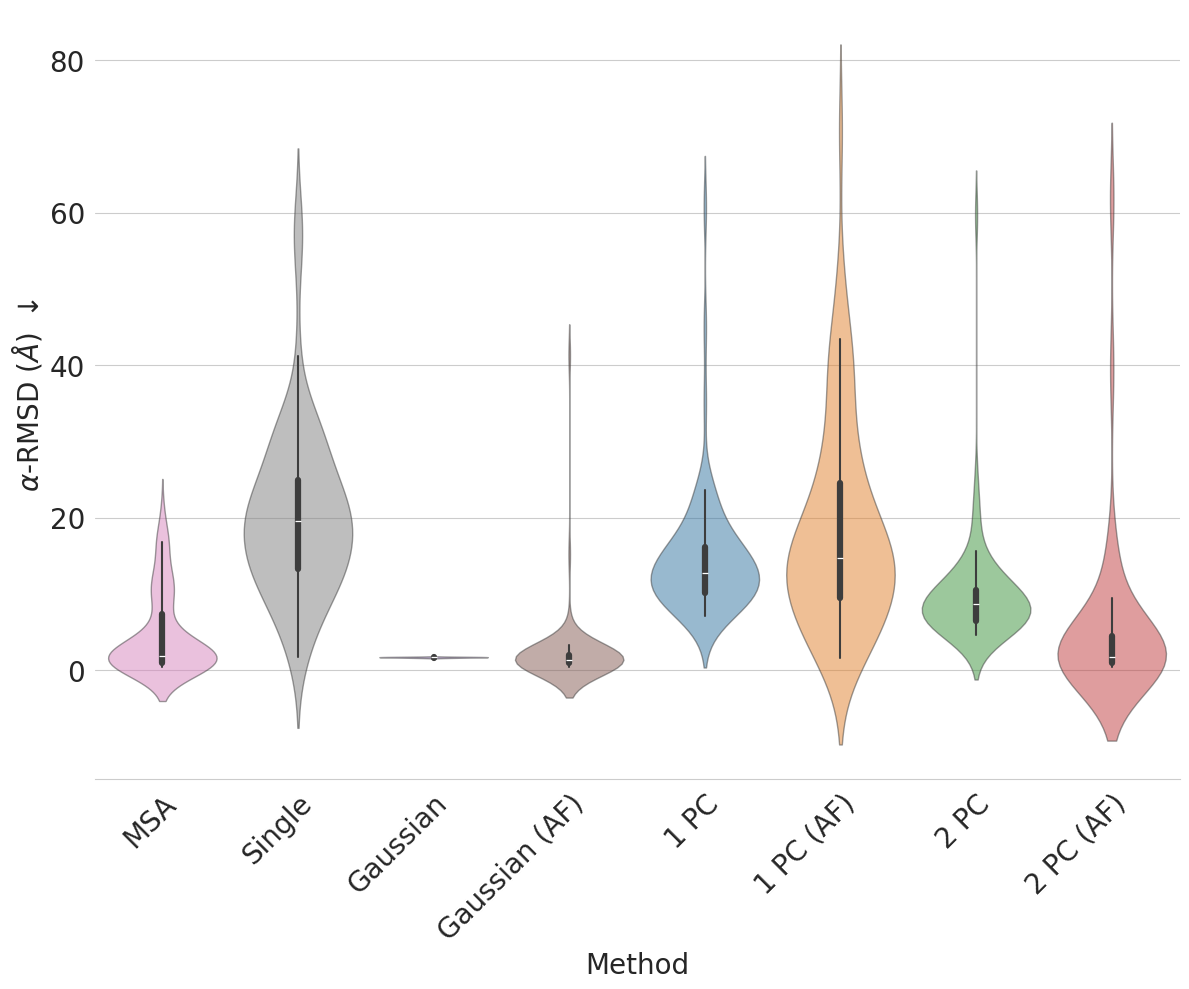

<Figure size 640x480 with 0 Axes>

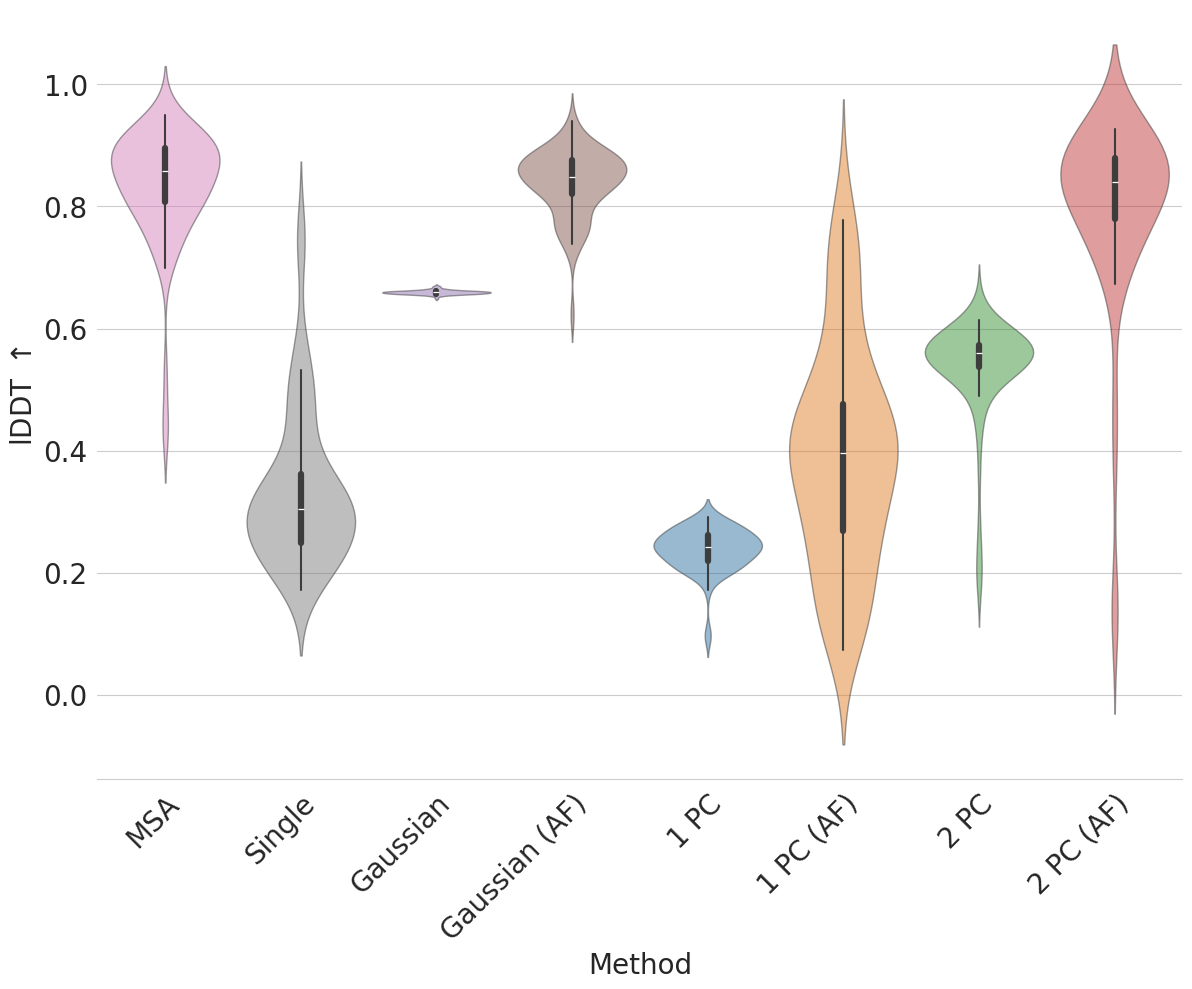

<Figure size 640x480 with 0 Axes>

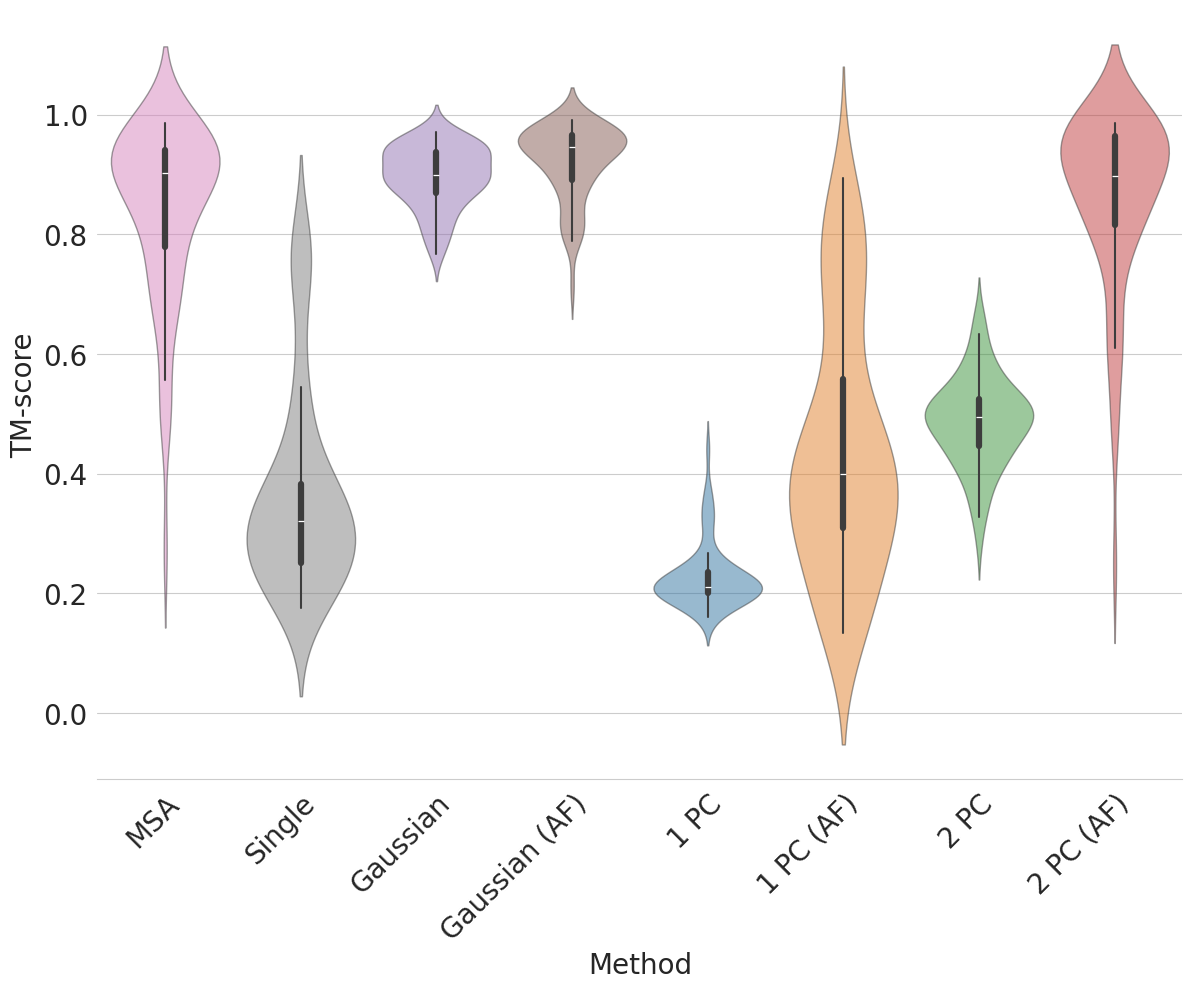

<Figure size 640x480 with 0 Axes>

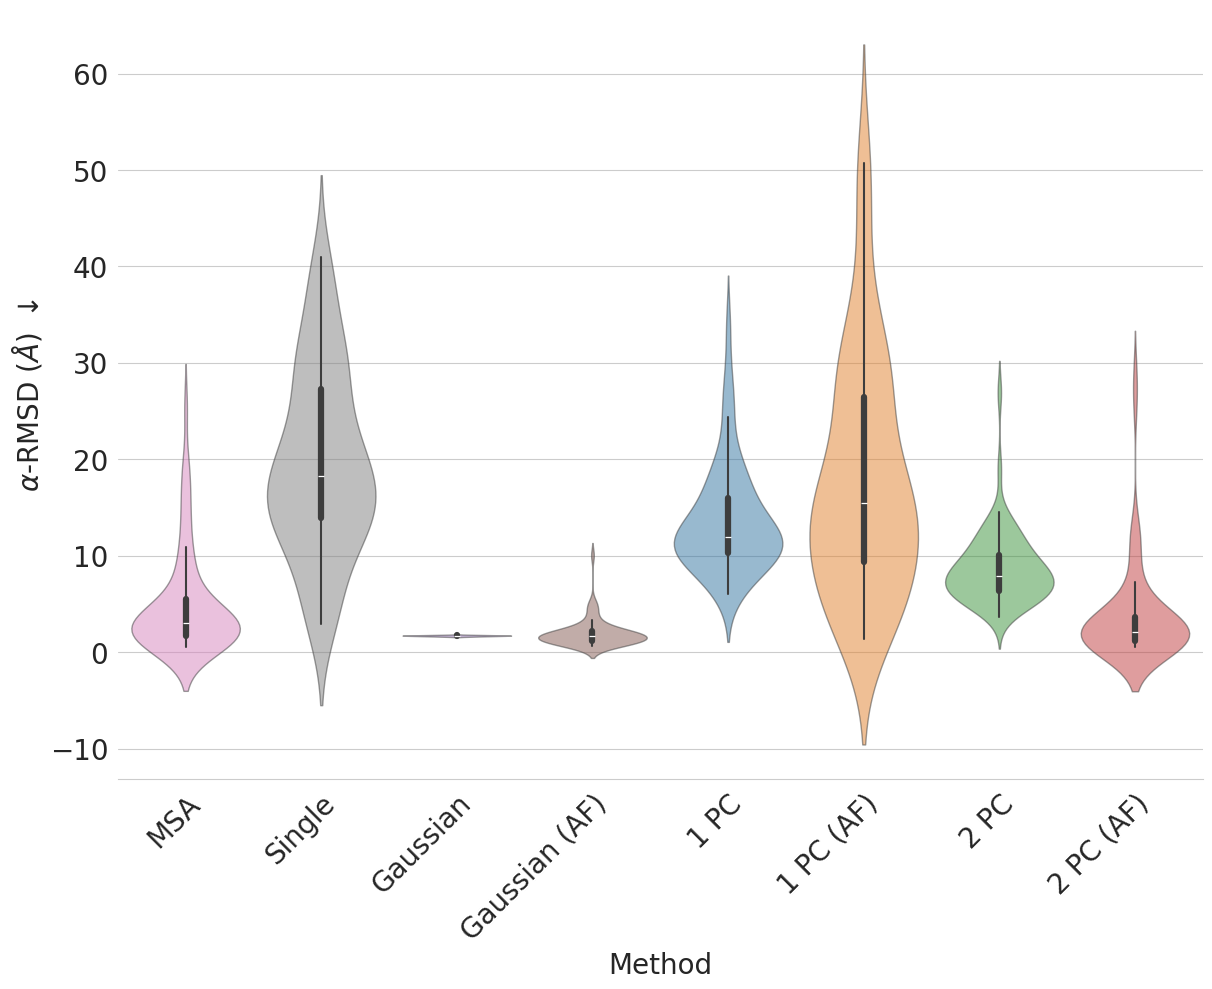

<Figure size 640x480 with 0 Axes>

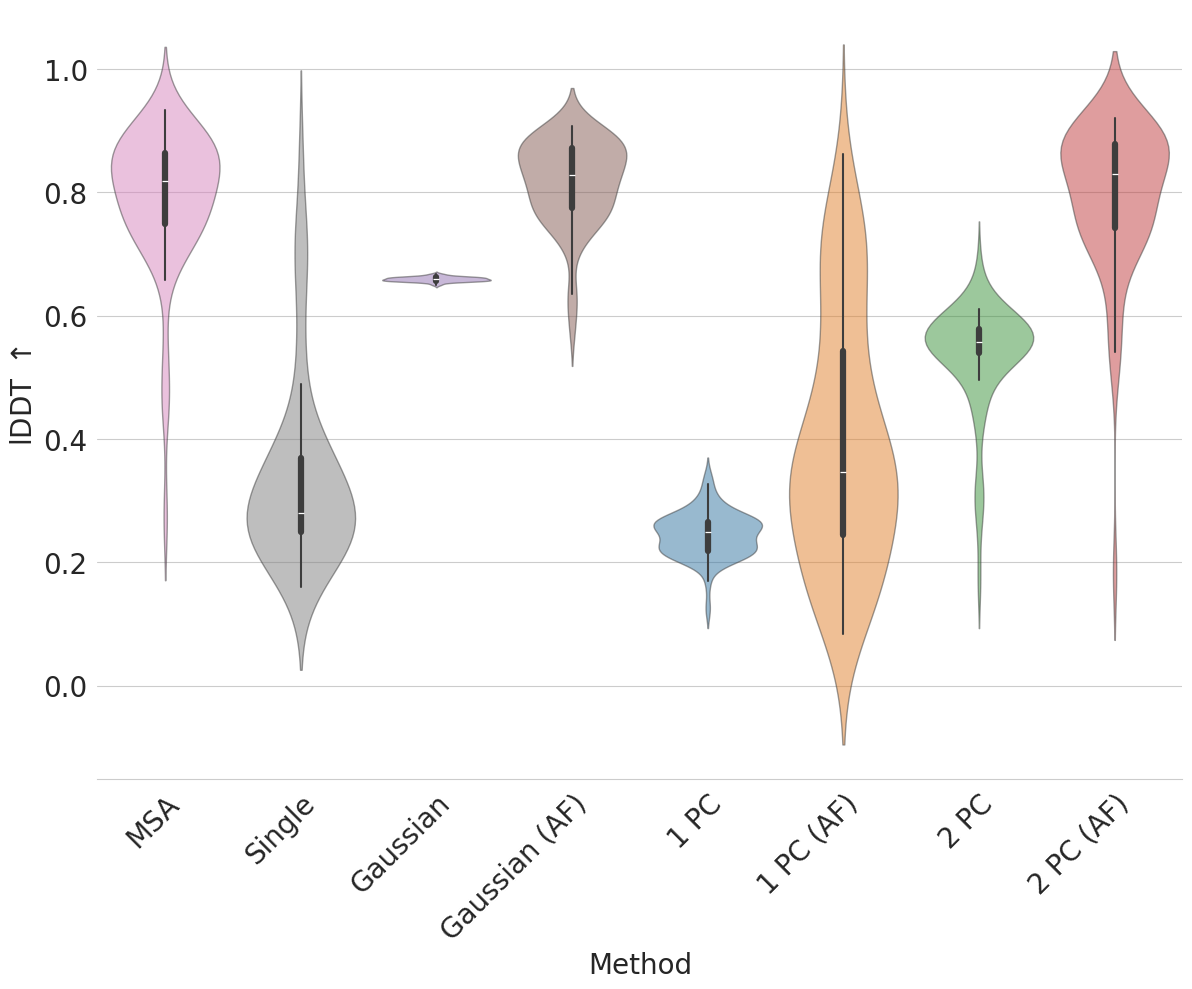

<Figure size 640x480 with 0 Axes>

In [13]:
violin_data = df.drop("method", axis=1).rename(measure_dict, axis=1)
for dataset in ["CASP13", "CASP14"]:
    for metric in ["TM-score", r"$\alpha$-RMSD ($\AA$) $\downarrow$", r"lDDT $\uparrow$"]:
        plt.figure(figsize=(14, 10))
        ax = sns.violinplot(
            violin_data[
                (violin_data["Dataset"] == dataset)
                & (violin_data["Method"].isin(order))
            ],
            x="Method",
            hue="Method",
            y=metric,
            linewidth=1,
            palette="tab10",
            order=order,
        )
        plt.setp(ax.collections, alpha=0.5)
        sns.despine(left=True)
        plt.rcParams.update(
            {
                "figure.facecolor": (0.0, 0.0, 0.0, 0.0),
                "axes.facecolor": (0.0, 0.0, 0.0, 0.0),
                "savefig.facecolor": (0.0, 0.0, 0.0, 0.0),
            }
        )
        plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
        plt.savefig(
            f"visualisations/backbone_violin_{dataset}_{metric}.svg",
            bbox_inches="tight",
            transparent=True,
        )
        plt.show()
        plt.clf()


## Make prev_x table

In [14]:
columns = [
    "TM-score $\\uparrow$",
    "lDDT $\\uparrow$",
    "$\\alpha$-RMSD ($\\AA$) $\\downarrow$",
]
measure_dict = {
    "lddt": "lDDT $\\uparrow$",
    "tm_score": "TM-score $\\uparrow$",
    "af_pLDDT_mean": "pLDDT $\\uparrow$",
    "rmsd": "$\\alpha$-RMSD ($\\AA$) $\\downarrow$",
    "method": "Method",
    "dataset": "Dataset",
}

In [23]:
df_prev_x = df.loc[df['template'].isin(df[df.method=="no_prev_x_1"].template.unique()), :].loc[df.method.isin(["full","single","no_prev_x_1","no_prev_x_2","prev_x_1","prev_x_2",])]

grouped = df_prev_x.drop("method", axis=1).rename(measure_dict, axis=1).sort_values("TM-score $\\uparrow$", ascending=False).groupby(["Method", "template"]).agg("first").groupby(["Method", "Dataset"])[columns].agg("mean").sort_values(["Method", "Dataset"])

grouped_std = (
    df_prev_x.drop("method", axis=1)
    .rename(measure_dict, axis=1)
    .sort_values("TM-score $\\uparrow$", ascending=False)
    .groupby(["Method", "template"])
    .agg("first")
    .groupby(["Method", "Dataset"])[columns]
    .agg("std")
    .sort_values(["Method", "Dataset"])
)
for column in columns:
    grouped_std[f"{column}"] = (
        grouped[column].apply(lambda x: f"{x:.3f}")
        + "$\\pm$"
        + grouped_std[column].apply(lambda x: f"{x:.3f}")
    )
grouped_std

TM-score $\uparrow$  lDDT $\uparrow$  \
Method    Dataset                                        
MSA       CASP13      0.848$\pm$0.172  0.835$\pm$0.105   
          CASP14      0.843$\pm$0.149  0.797$\pm$0.116   
Single    CASP13      0.379$\pm$0.153  0.347$\pm$0.137   
          CASP14      0.386$\pm$0.183  0.356$\pm$0.167   
no_prev_x CASP13      0.853$\pm$0.180  0.832$\pm$0.113   
          CASP14      0.848$\pm$0.146  0.794$\pm$0.116   
prev_x    CASP13      0.428$\pm$0.164  0.379$\pm$0.145   
          CASP14      0.430$\pm$0.197  0.385$\pm$0.187   

                  $\alpha$-RMSD ($\AA$) $\downarrow$  
Method    Dataset                                     
MSA       CASP13                     4.729$\pm$5.573  
          CASP14                     4.859$\pm$5.627  
Single    CASP13                   20.169$\pm$12.025  
          CASP14                   18.898$\pm$10.186  
no_prev_x CASP13                     4.914$\pm$6.223  
          CASP14                     4.732$\pm$5.885  
prev_x    CASP13                   18.949$\pm$12.108  
          CASP14                    16.953$\pm$9.927

In [24]:
selected_rows = list(method_dict.values())
grouped_std.to_latex(escape=False, bold_rows=True)

'\\begin{tabular}{lllll}\n\\toprule\n &  & TM-score $\\uparrow$ & lDDT $\\uparrow$ & $\\alpha$-RMSD ($\\AA$) $\\downarrow$ \\\\\nMethod & Dataset &  &  &  \\\\\n\\midrule\n\\multirow[t]{2}{*}{\\textbf{MSA}} & \\textbf{CASP13} & 0.848$\\pm$0.172 & 0.835$\\pm$0.105 & 4.729$\\pm$5.573 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.843$\\pm$0.149 & 0.797$\\pm$0.116 & 4.859$\\pm$5.627 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{Single}} & \\textbf{CASP13} & 0.379$\\pm$0.153 & 0.347$\\pm$0.137 & 20.169$\\pm$12.025 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.386$\\pm$0.183 & 0.356$\\pm$0.167 & 18.898$\\pm$10.186 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{no_prev_x}} & \\textbf{CASP13} & 0.853$\\pm$0.180 & 0.832$\\pm$0.113 & 4.914$\\pm$6.223 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.848$\\pm$0.146 & 0.794$\\pm$0.116 & 4.732$\\pm$5.885 \\\\\n\\cline{1-5}\n\\multirow[t]{2}{*}{\\textbf{prev_x}} & \\textbf{CASP13} & 0.428$\\pm$0.164 & 0.379$\\pm$0.145 & 18.949$\\pm$12.108 \\\\\n\\textbf{} & \\textbf